<a href="https://colab.research.google.com/github/Valentina-Gol/math_packages_leti/blob/main/math_package_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

In [6]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [42]:
from scipy.io import  wavfile
import scipy.io

sample_rate, data = wavfile.read('/content/drive/MyDrive/Colab_Notebooks/03-01-05-01-01-02-03_A3.wav')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


## Загрузка аудио сигнала и построение огибающей кривой

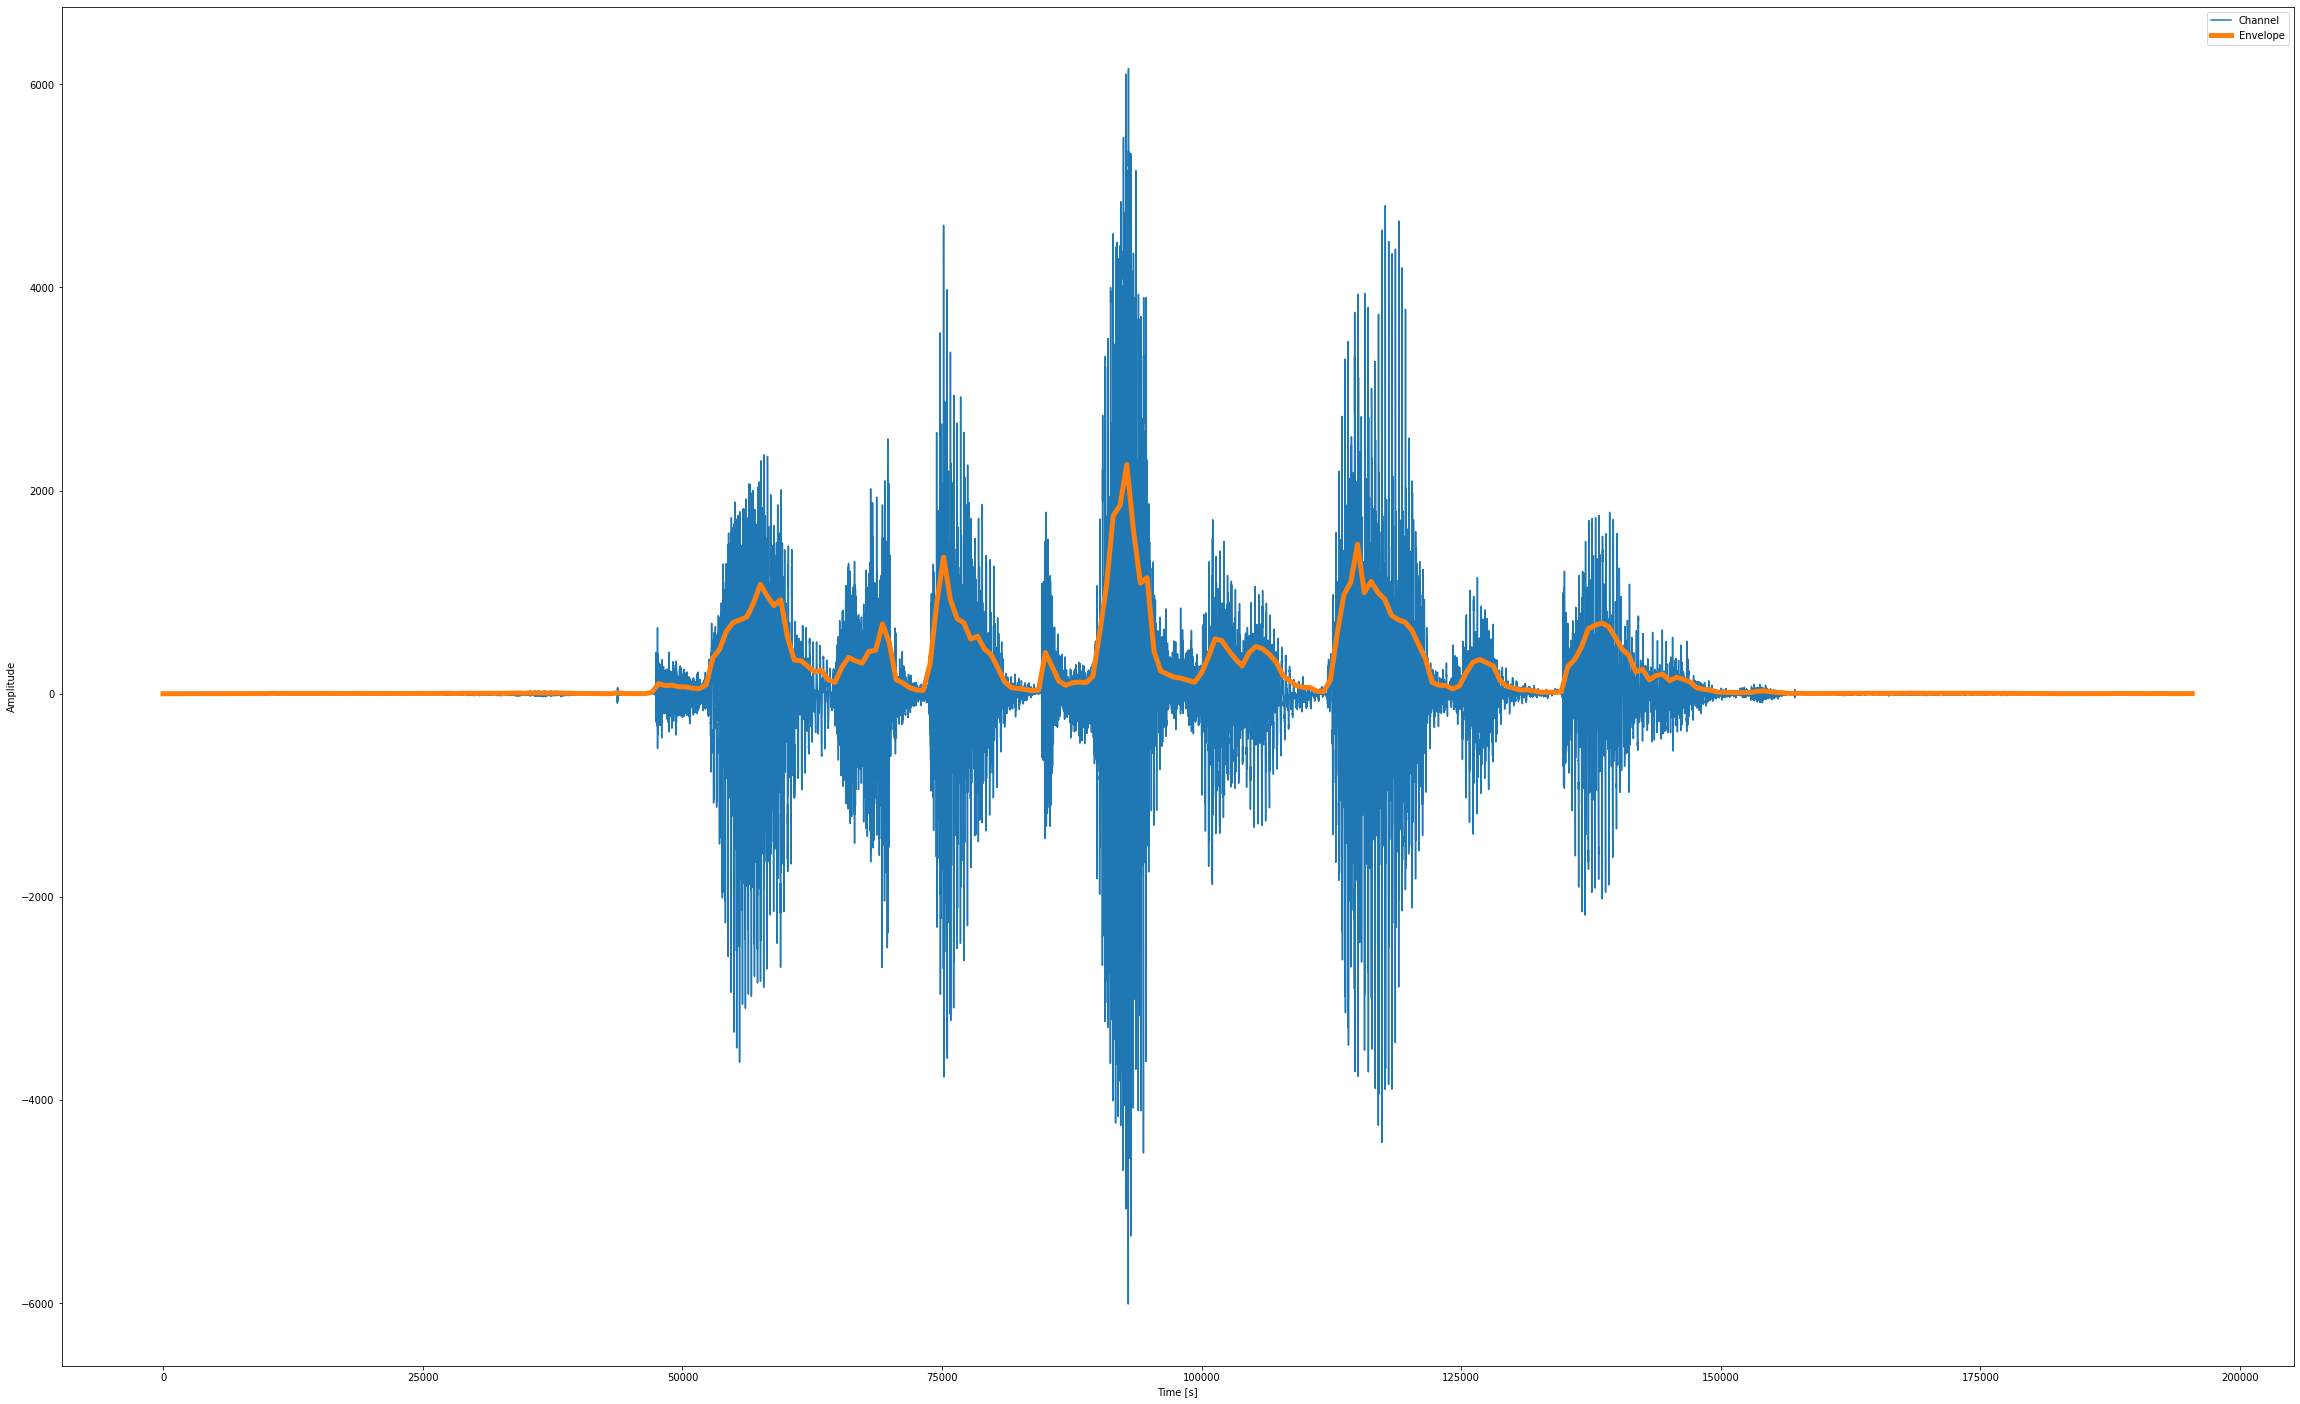

In [62]:
import matplotlib.pyplot as plt
import numpy as np

num_dots = 300
length_signal = data.shape[0]
time = np.linspace(0, length_signal, length_signal)

m = int(length_signal / num_dots)
curve = np.linspace(0, length_signal, num_dots)
curve_values = []
for j in range(num_dots):
  sum = 0
  for k in range(m * j, m * j + m):
    sum += abs(data[k])
  curve_values.append(sum / m)
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(25)
plt.plot(time, data, label="Channel")
plt.plot(curve, curve_values, label="Envelope", linewidth=5)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()